In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
df = pd.read_csv('tesla.csv')

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [20]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [21]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

In [22]:
# Linear Regression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
print(regressor.coef_)

[ 8.67451472e-01  7.26247207e-01 -5.94779343e-01 -2.02861685e-08]


In [26]:
print(regressor.intercept_)

-0.02688118309231413


In [27]:
predicted = regressor.predict(x_test)

In [28]:
print(predicted)

[329.40212937  24.35778234 188.01769493 242.35382501  37.2301427
  28.40561367 213.10989712 208.58323546 218.35557175 332.41763636
 284.1194343  255.29677469 251.91578314 248.36401544  31.0063068
 123.41065767  28.54267338  30.97871284  23.95471092 345.31870916
 330.98942616  29.47271686 237.43510165 151.89990336  25.87629306
 267.68709964  29.95601462 252.33727719  35.42617458 170.83027379
  21.59707889  29.70628698  34.7983908  122.91111244  28.32775607
  29.44207743 157.51622965 199.5590655   28.73233824 315.25997277
 248.63362038 233.23764647  20.72041083 256.1667647  307.58553144
 361.51459392 287.04684998 263.65011633 111.71047955  28.36402329
 206.68765568 243.91103319 201.78242907 353.47014801  33.88980975
 200.66763727 341.57957775 187.05753549 367.95806092 353.37586119
 279.98625777  35.59156193 191.13179129  24.66536375  90.28249539
  30.21594999 345.84570165 205.52839059 196.67238763 221.70538538
 304.42044404 262.42516635 204.56573631  20.3203034  326.45848344
 248.8238366

In [29]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [30]:
df2.head(25)

,Actual,Predicted
0,332.799988,329.402129
1,24.340000,24.357782
2,193.910004,188.017695
3,240.009995,242.353825
4,37.400002,37.230143
5,28.370001,28.405614
6,211.169998,213.109897
7,210.240005,208.583235
8,220.679993,218.355572
9,334.459991,332.417636


In [31]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.3782280626252839
Mean Squared Error: 3.9090508840931393
Root Mean Squared Error: 1.9771319844899429


In [32]:
graph = df2.head(20)

<AxesSubplot:>

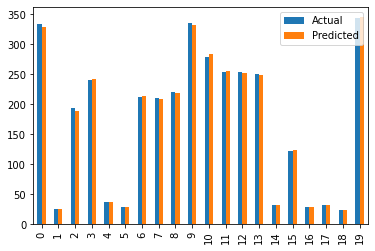

In [33]:
graph.plot(kind='bar')